# GRIP: The Sparks Foundation
## Data Science and Business Analytics

# Author: Mithilesh Sanjay Mahatme

# Task 1: Prediction using Supervised ML

### Problem Statement:

**We have to Predict the percentage of an student based on the no. of study hours. This is a simple linear regression task as it involves just 2 variables. What will be predicted score if a student studies for 9.25 hrs/ day?**

## Step-1: Reading and Understanding Data

In [1]:
# import the important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
# read the data
data = pd.read_csv('http://bit.ly/w-data')
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
# Let's look at the shape of the data
data.shape

(25, 2)

There are 25 rows and 2 columns in the data.

In [4]:
# Let's look at the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
# Let's look at the statistical summary of the data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


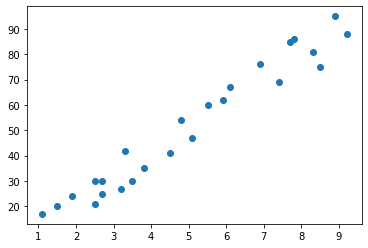

In [6]:
# visualise the data
# scatterplot
plt.scatter(x='Hours', y='Scores', data=data)
plt.show()

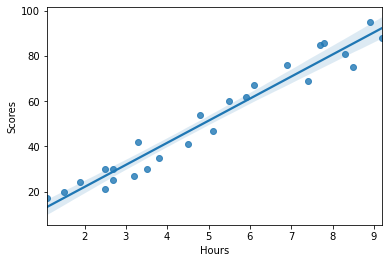

In [7]:
# linear regression plot
sns.regplot(x='Hours',y='Scores',data=data)
plt.show()

In [8]:
# Correlation
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


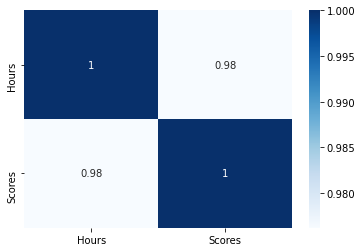

In [9]:
# Heatmap
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.show()

## Step 2: Performing Simple Linear Regression Using `sklearn`

**Steps**
- Create X and y
- Create train and test (70-30)
- Create an object of linear regression
- Fit the model (i.e. to learn the coefficients)
- See the parameters
- Make predictions
- Evaluate the model (training set, test set)

In [10]:
# create Xand y
X = data['Hours']
y = data['Scores']

In [11]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [12]:
# Reshape X_train, y_train, X_test, y_test to (17,1)
X_train_lm = X_train.values.reshape(-1,1)
y_train_lm = y_train.values.reshape(-1,1)
X_test_lm = X_test.values.reshape(-1,1)
y_test_lm = y_test.values.reshape(-1,1)

In [13]:
# create an object of linear regression
lm = LinearRegression()

# fit the model
lm.fit(X_train_lm, y_train_lm)

LinearRegression()

In [14]:
# see the parameters
print(lm.coef_)
print(lm.intercept_)

[[10.28772617]]
[1.11191942]


In [15]:
# make predictions
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

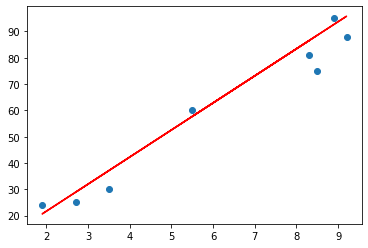

In [16]:
# plotting regression line for the test data
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

## What will be predicted score if a student studies for 9.25 hrs/ day?

In [17]:
hours = [[9.25]]
pred = lm.predict(hours)
print(pred)

[[96.2733865]]


## If a student studies for 9.25 hrs/ day, the predicted score will be 96.27

In [18]:
# evaluate the model
print('r2 score of training set is',r2_score(y_true=y_train, y_pred=y_train_pred))
print('r2 score of test set is',r2_score(y_true=y_test, y_pred=y_test_pred))

r2 score of training set is 0.9483961738655812
r2 score of test set is 0.9406184550068741


In [19]:
# mean squared error
print('The mean squared error is',mean_squared_error(y_true=y_test, y_pred=y_test_pred))

The mean squared error is 45.24502593819982
